

## ARIMA (AutoRegressive Integrated Moving Average)

* Used to understand data and forecast future values
* It works well when data does not depend on external factors 
* Several models (ARIMA, SARIMA, SARIMAX)
* "Integrated" part of the model helps to manage non-stationary data

#### ARIMA(p,d,q)
* AR(p) : Autoregration model that exploits relationship between the current observation and the previous ones over a given period (and a stochastic, not predictable term)
* I(d) : differencing process
* MA(q) : it exploits dependency between the current observation and the residual error from a moving average model applied to q lagged observations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
ts = pd.read_csv('./data2.csv', header=0, parse_dates=[0], dayfirst=True, index_col=0)
tsr = ts.resample(rule='20T').mean()

<AxesSubplot: xlabel='Time'>

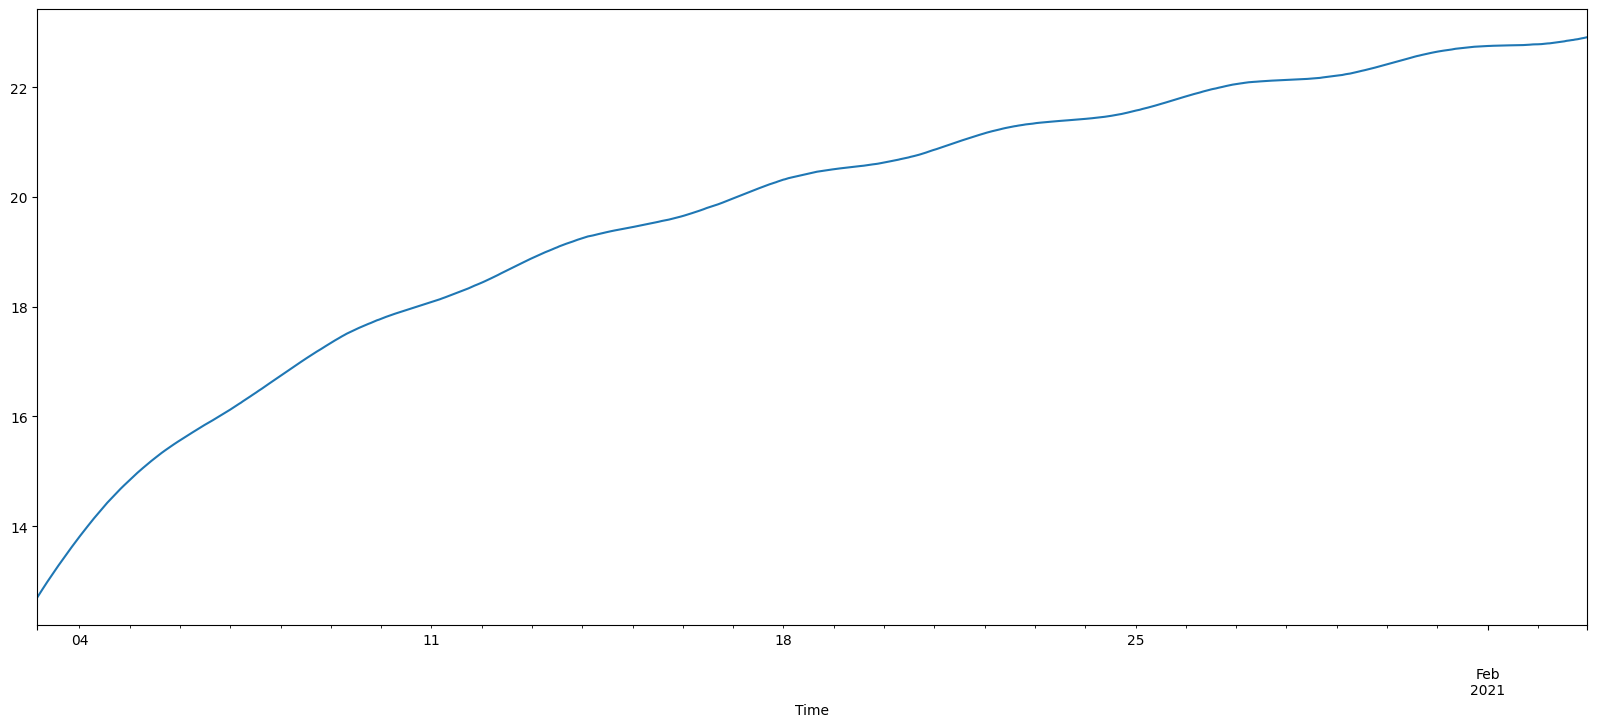

In [2]:
# try to predict trend: Extract TREND
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(tsr, model='additive', period=310)  
trend = result.trend.dropna()
trend.plot(figsize=(20,8))

In [3]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
auto_arima(trend)

ARIMA(order=(3, 2, 5), scoring_args={}, suppress_warnings=True)

In [5]:
arima_trend = auto_arima(trend)

In [7]:
arima_trend.summary()
#check for AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2220
Model:               SARIMAX(3, 2, 5)   Log Likelihood               14438.321
Date:                Tue, 20 Dec 2022   AIC                         -28856.642
Time:                        23:57:31   BIC                         -28799.598
Sample:                    01-03-2021   HQIC                        -28835.806
                         - 02-02-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -9.291e-06   1.92e-06     -4.830      0.000   -1.31e-05   -5.52e-06
ar.L1          0.3308      0.008     43.968      0.000       0.316       0.346
ar.L2         -0.6046      0.007    -89.935      0.000      -0.618      -0.591
ar.L3          0.6333      0.007     85.925      0.000       0.619       0.648
ma.L1         -0.3160      0.011    -28.587      0.000      -0.338      -0.294
ma.L2         -0.2087      0.014    -15.203      0.000      -0.236      -0.182
ma.L3         -0.3208      0.011    -29.803      0.000      -0.342      -0.300
ma.L4         -0.4719      0.016    -30.230      0.000      -0.503      -0.441
ma.L5          0.5634      0.014     40.690      0.000       0.536       0.591
sigma2      1.289e-07   3.59e-09     35.893      0.000    1.22e-07    1.36e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                25.39
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.85e+17. Standard errors may be unstable.
"""

The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data.

Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

In [ ]:
arima_tsr = auto_arima(tsr, start_p=3, start_q=0,
                          max_p=6, max_q=3, m=320,
                          seasonal=True,
                          d=None, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True, 
                          stepwise=True)

Performing stepwise search to minimize aic
